# Máquina de vetor suporte

Considere o problema de classificação:

In [25]:
using Plots
gr(size=(600,600))
default(fmt = :png)

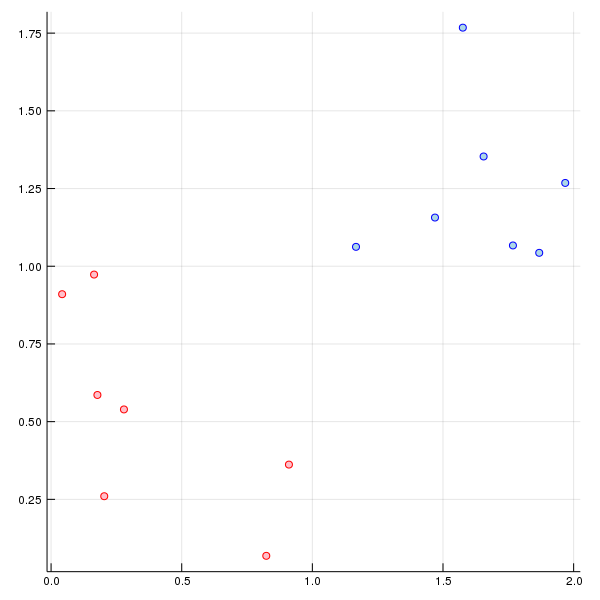

In [26]:
srand(0)
m = 14
x = [rand(div(m,2), 2);
     rand(div(m,2), 2) .+ 1]
y = [any(x[i,:] .> 1) ? 1 : -1 for i = 1:m]
P = find(y .== 1)
N = find(y .== -1)
scatter(x[P,1], x[P,2],  m=(stroke(1,:blue),:lightblue,4), leg=false)
scatter!(x[N,1], x[N,2], m=(stroke(1,:red),:pink,4))

O conjunto de dados é dito linearmente separável porque existe uma reta que separa os pontos de uma classe dos da outra.

De uma maneira geral, um conjunto $\{(x^i,y^i), i = 1,\dots,m\}$ com $x_i$ de $N$ características e $y^i \in \{-1,1\}$ é dito separável se existe $w \in \mathbb{R}^N$ e $b \in \mathbb{R}$ tais que o hiperplano $x^Tw + b = 0$ separa os pontos com $y = 1$ dos com $y = -1$. Em outras palavras, podemos dizer que
$$ \left\{\begin{array}{ll}
(w^Tx^i + b > 0, & y^i = 1 \\
w^Tw^i + b < 0, & y^i = -1
\end{array}\right. $$

No caso acima, 2D, $w^Tx + b = 0$ implica em $x_2 = -(b + w_1x) / w_2$ e podemos desenhar a reta.

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_47", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-a25f2bca-2c02-4c76-8e59-68ee2973aa53", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["w1"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 1.2),Pair{Symbol,Any}(:min, 0.8),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 0.0444444),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Float64}("ob_46", 0.977778, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/abel/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/abel/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/abel/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/abel/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/abel/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":0.9777777777777777}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(fu
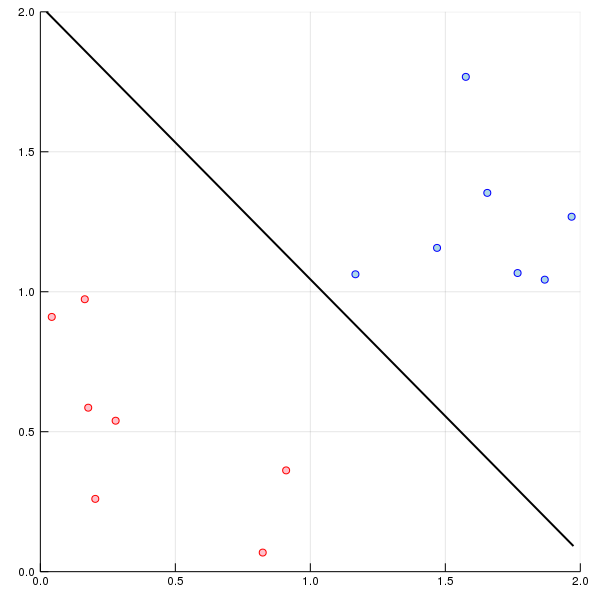
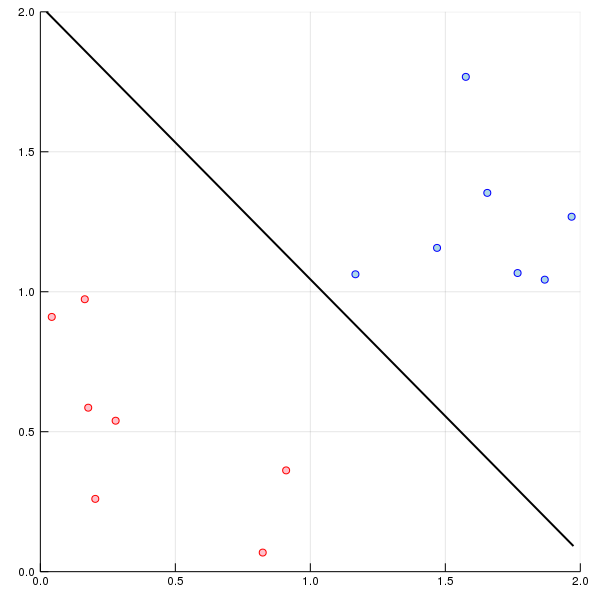

In [27]:
using Interact

w2 = 1.0
@manipulate for w1 = linspace(0.8, 1.2, 10),
                 b = linspace(-2.2, -1.8, 10)
    scatter(x[P,1], x[P,2],  m=(stroke(1,:blue),:lightblue,4), leg=false)
    scatter!(x[N,1], x[N,2], m=(stroke(1,:red),:pink,4))

    plot!(x -> -(w1 * x + b) / w2, 0, 2, c=:black, lw=2)
    xlims!(0, 2)
    ylims!(0, 2)
end

- Se os dados são linearmente separáveis, existem infinitos **hiperplanos separadores**;
- Além disso, para um hiperplano $w^Tx + b = 0$, qualquer múltiplo positivo de $(w,b)$ representa o mesmo hiperplano;
- Queremos o **melhor** hiperplano separador;
- Queremos fixar de algum modo para que ele seja unicamente representado.

A medida que utilizaremos para definir um bom separador é a distância da reta ao conjunto.

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_56", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-722ae0e0-c12b-4443-b001-631ea5520f42", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["w1"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 1.1),Pair{Symbol,Any}(:min, 0.7),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 0.004),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Float64}("ob_55", 0.9, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/abel/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/abel/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/abel/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/abel/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/abel/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":0.9}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {return this.v
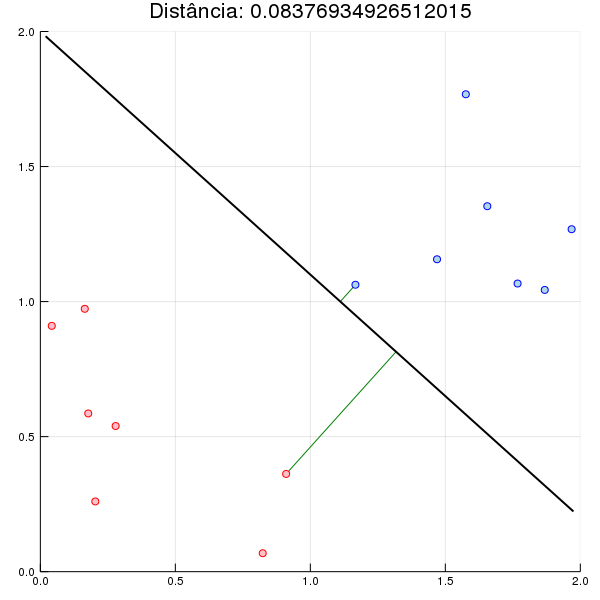
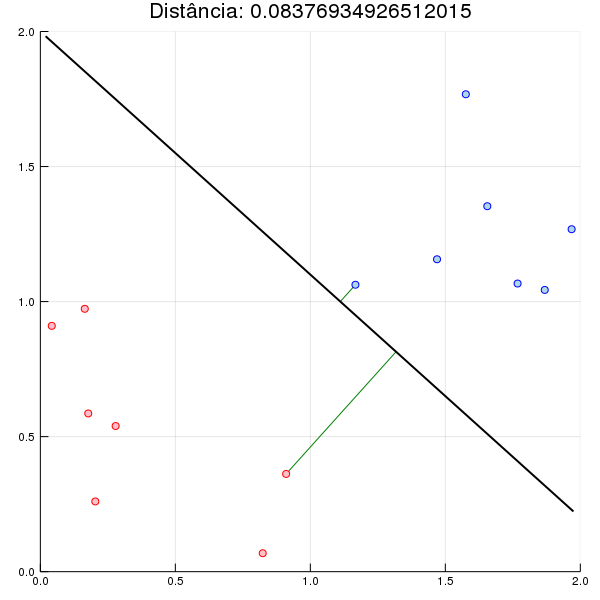

In [28]:
w2 = 1.0
@manipulate for w1 = linspace(0.7, 1.1, 101),
                 b = linspace(-2.5, -1.5, 101)
    plot(leg = false)
    
    w = [w1; w2]
    D = round.([dot(w, x[i,:]) + b for i = 1:m], 5)
    
    for set in [P, N]
        I = find(abs.(D[set]) .== minimum(abs.(D[set])))
        for i = I
            xi = x[set[i],:]
            α = -(b + dot(w, xi)) / dot(w, w)
            yi = xi + α * w
            plot!([xi[1], yi[1]], [xi[2], yi[2]], c=:green)
        end
    end
    
    i = indmin(abs.(D))
    α = abs(b + dot(w, x[i,:])) / dot(w, w)
    s = α * norm(w)
    
    scatter!(x[P,1], x[P,2],  m=(stroke(1,:blue),:lightblue,4), leg=false)
    scatter!(x[N,1], x[N,2], m=(stroke(1,:red),:pink,4))

    title!("Distância: $s")
    plot!(x -> -(w1 * x + b) / w2, 0, 2, c=:black, lw=2)
    
    xlims!(0, 2)
    ylims!(0, 2)
end

Perceba que a solução fica igualmente afastada dos dois conjuntos.

E para mantermos única a escolha de $w$ e $b$, fazemos com que $w^Tx + b = 1$ para o ponto com $y^i = 1$ mais próximo e $w^Tx + b = -1$ para o ponto com $y^i = -1$ mais próximo.

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_77", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-8d001d53-a95a-4f37-9f91-c93416193e1f", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["β"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 10.5),Pair{Symbol,Any}(:min, 0.5),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 0.1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Float64}("ob_76", 5.5, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/abel/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/abel/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/abel/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/abel/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/abel/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":5.5}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {return this.val
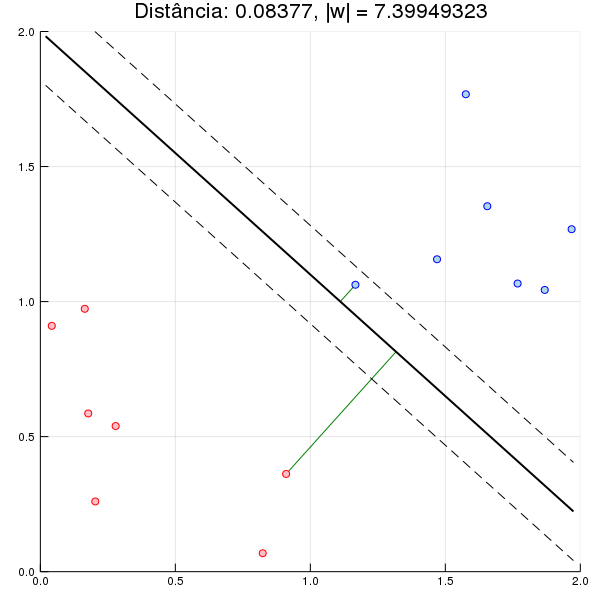
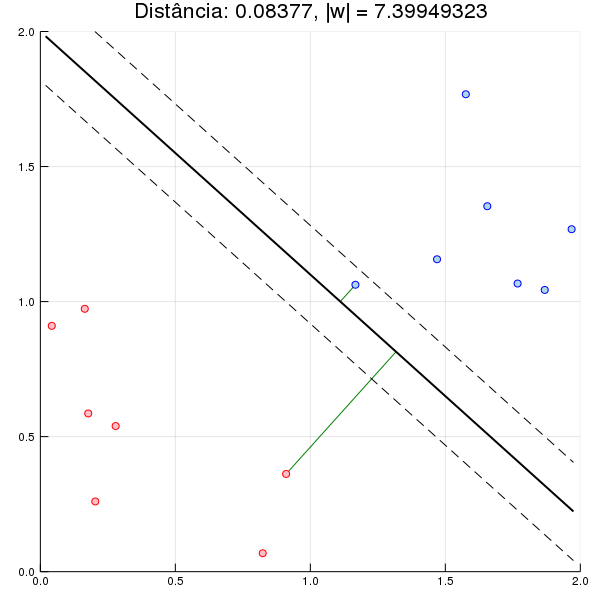

In [30]:
@manipulate for β = linspace(0.5, 10.5, 101),
                w1 = linspace(0.7, 1.1, 101),
                b = linspace(-2.5, -1.5, 101)
    plot(leg = false)

    w = [β * w1; β]
    b = b * β
    D = round.([dot(w, x[i,:]) + b for i = 1:m], 5)
    
    for set in [P, N]
        I = find(abs.(D[set]) .== minimum(abs.(D[set])))
        for i = I
            xi = x[set[i],:]
            α = -(b + dot(w, xi)) / dot(w, w)
            yi = xi + α * w
            plot!([xi[1], yi[1]], [xi[2], yi[2]], c=:green)
        end
    end
    
    i = indmin(abs.(D))
    α = abs(b + dot(w, x[i,:])) / dot(w, w)
    s = @sprintf("%0.5f", α * norm(w))
    nw = @sprintf("%3.8f", norm(w))
    
    scatter!(x[P,1], x[P,2],  m=(stroke(1,:blue),:lightblue,4), leg=false)
    scatter!(x[N,1], x[N,2], m=(stroke(1,:red),:pink,4))

    title!("Distância: $s, |w| = $nw")
    plot!(x -> -(w[1] * x + b) / w[2], 0, 2, c=:black, lw=2)
    plot!(x -> -(1 + w[1] * x + b) / w[2], 0, 2, c=:black, l=:dash)
    plot!(x -> -(-1 + w[1] * x + b) / w[2], 0, 2, c=:black, l=:dash)
    
    xlims!(0, 2)
    ylims!(0, 2)
end

Sendo assim, consideramos todos os $w$ e $b$ tais que
$$ \left\{\begin{array}{ll}
w^Tx^i + b \geq 1,  & \quad y^i = 1 \\
w^Tx^i + b \leq -1, & \quad y^i = -1,
\end{array}\right.$$

e buscamos o que maximiza a margem.

Seja $x$ um ponto qualquer do hiperplano $w^Tx + b = 1$ e $y$ o ponto mais próximo no outro hiperplano, i.e.,
$w^Ty + b = -1$.
Como $y$ é o mais próximo, o vetor $y - x$ é normal ao plano. Mas a normal do plano é $w$, então
$y - x = \alpha w$.

Fazendo $w^(y - x) = \alpha w^Tw$, obtemos $\alpha = \dfrac{-2}{w^Tw}$.
Como queremos $\Vert y - x\Vert$, temos
$$ \Vert y - x\Vert = \frac{2}{\Vert w\Vert}. $$

Ou seja, queremos maximizar $$ \frac{2}{\Vert w\Vert}. $$

Como $\Vert w\Vert > 0$, maximizar essa fração é equivalente a minimizar $\Vert w\Vert$, que por sua vez equivale a minimizar $\frac{1}{2}\Vert w\Vert^2$.

Um pequeno truque na hora de escrever as restrições é usar o valor de $y^i$:

$$ y^i (w^T x^i + b) \geq 1, \qquad i = 1,\dots,m. $$

Portanto, nosso problema de encontrar o hiperplano separador vira

\begin{align}
\min & \quad \frac{1}{2}\Vert w\Vert^2 \\
& \quad y^i(w^T x^i + b) \geq 1, \qquad i = 1,\dots,m.
\end{align}

Problemas de otimização com restrições costumam ser muito mais difíceis, e não temos como implementar um método simples para resolvé-lo com o pouco tempo da disciplina. Vamos utilizar uma biblioteca de modelagem e um solver pronto para encontrar a solução.

In [31]:
using JuMP, Ipopt

model = Model(solver = IpoptSolver(print_level = 0))
@variable(model, w[1:2])
@variable(model, b)
@objective(model, Min, 0.5 * dot(w, w))
@constraint(model, [i = 1:m], y[i] * (dot(w, x[i,:]) + b) >= 1.0)

solve(model)
w = getvalue(w)
b = getvalue(b)
w, b

([1.79982, 2.19548], -3.432869482639093)

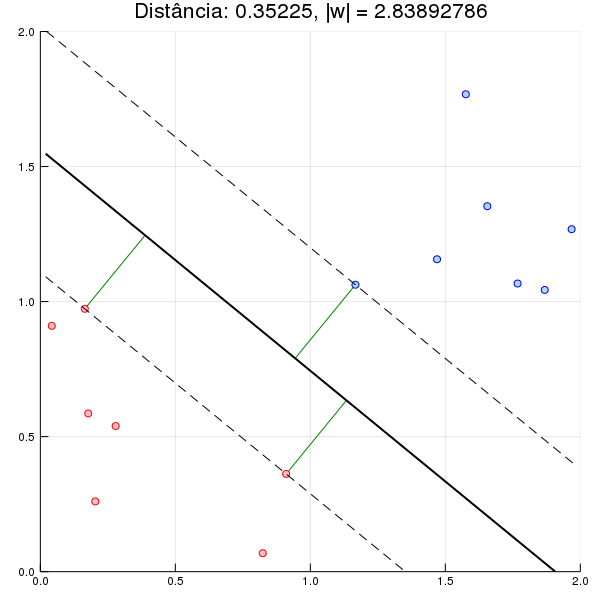

In [32]:
plot(leg = false)

D = round.([dot(w, x[i,:]) + b for i = 1:m], 5)
    
for set in [P, N]
    I = find(abs.(D[set]) .== minimum(abs.(D[set])))
    for i = I
        xi = x[set[i],:]
        α = -(b + dot(w, xi)) / dot(w, w)
        yi = xi + α * w
        plot!([xi[1], yi[1]], [xi[2], yi[2]], c=:green)
    end
end

i = indmin(abs.(D))
α = abs(b + dot(w, x[i,:])) / dot(w, w)
s = @sprintf("%0.5f", α * norm(w))
nw = @sprintf("%3.8f", norm(w))

scatter!(x[P,1], x[P,2],  m=(stroke(1,:blue),:lightblue,4), leg=false)
scatter!(x[N,1], x[N,2], m=(stroke(1,:red),:pink,4))

title!("Distância: $s, |w| = $nw")
plot!(x -> -(w[1] * x + b) / w[2], 0, 2, c=:black, lw=2)
plot!(x -> -(1 + w[1] * x + b) / w[2], 0, 2, c=:black, l=:dash)
plot!(x -> -(-1 + w[1] * x + b) / w[2], 0, 2, c=:black, l=:dash)

xlims!(0, 2)
ylims!(0, 2)

O motivo pelo nome do método se explica agora: os pontos mais próximos da reta, isto é, aqueles sobre |w^Tx + b| = 1, são ditos **vetores suporte**. Note que só eles importam.

## Condições de Otimalidade e Dualidade

Da mesma maneira que tínhamos $\nabla f(x) = 0$ para a minimização de uma função irrestrita, existem condições sobre o minimizador do problema de otimização acima.

No caso acima, como $w$ são as variáveis de minimização, diremos que existe vetor $\alpha \in \mathbb{R}^m$ tal que
\begin{align}
 w & = \sum_{i=1}^m y^ix^i\alpha_i \\
 0 & = \sum_{i=1}^m y^i \alpha_i \\
 y^i (w^Tx^i + b) & \geq 1, \qquad i = 1,\dots,m \\
 \big(y^i (w^Tx^i + b) - 1\big) \alpha_i & = 0, \\
 \alpha & \geq 0.
\end{align}

\begin{align}
\max \qquad & -\frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y^i y^j (x^i)^T x^j + 
\sum_{i = 1}^m \alpha_i \\
& \sum_{i = 1}^m y^i \alpha_i = 0, \\
& \alpha \geq 0.
\end{align}

Obtida $\alpha$, solução desse problema, basta ver que se $\alpha_i > 0$, então a restrição $i$ está ativa, e logo o vector $x^i$ é de suporte.

In [33]:
model = Model(solver = IpoptSolver(print_level=0))
@variable(model, α[1:m] ≥ 0)
@objective(model, Max, -0.5 * sum(α[i] * α[j] * y[i] * y[j] * dot(x[i,:], x[j,:]) for i = 1:m, j = 1:m)
    + sum(α[i] for i = 1:m))
@constraint(model, sum(y[i] * α[i] for i = 1:m) == 0)
solve(model)

α = getvalue(α)

14-element Array{Float64,1}:
 0.0    
 3.00337
 1.02638
 0.0    
 0.0    
 0.0    
 0.0    
 4.02976
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    

In [34]:
J = find(α .> 0)
w = x[J,:]' * (α[J] .* y[J])

2-element Array{Float64,1}:
 1.79982
 2.19548

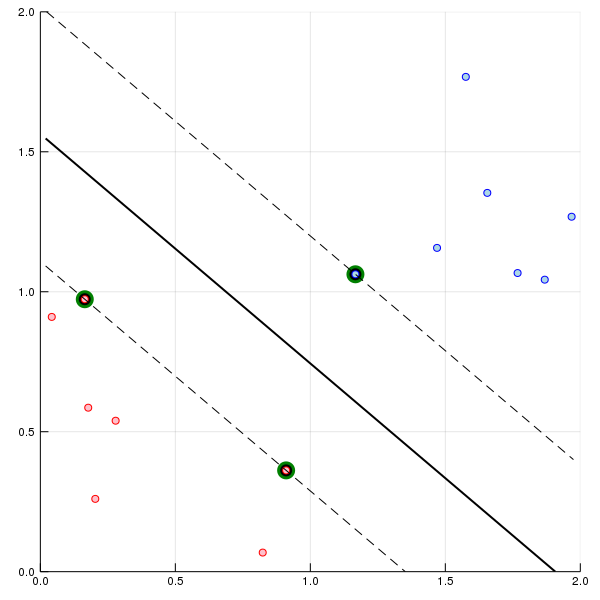

In [35]:
J = find(α .> 0)

plot(leg = false)

w = x[J,:]' * (α[J] .* y[J])
b = y[J[1]] - dot(w, x[J[1],:])

scatter!(x[J,1], x[J,2], m=(stroke(3,:green),:gray,7))

scatter!(x[P,1], x[P,2],  m=(stroke(1,:blue),:lightblue,4), leg=false)
scatter!(x[N,1], x[N,2], m=(stroke(1,:red),:pink,4))

plot!(x -> -(w[1] * x + b) / w[2], 0, 2, c=:black, lw=2)
plot!(x -> -(1 + w[1] * x + b) / w[2], 0, 2, c=:black, l=:dash)
plot!(x -> -(-1 + w[1] * x + b) / w[2], 0, 2, c=:black, l=:dash)

xlims!(0, 2)
ylims!(0, 2)

## Dados não linearmente separáveis

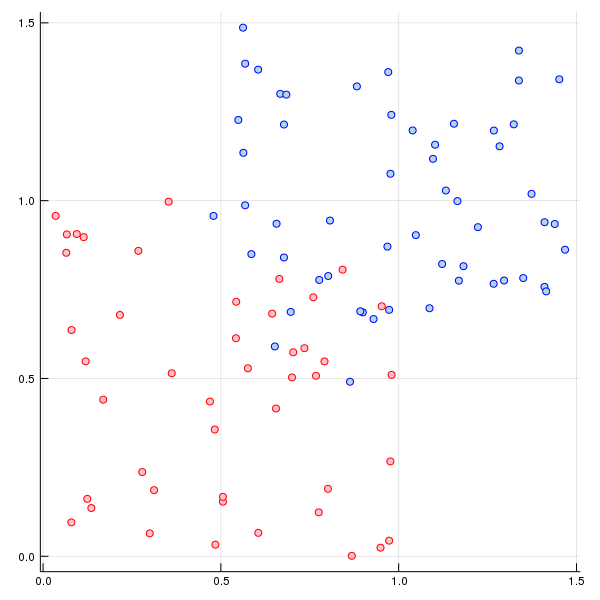

In [37]:
srand(0)
m = 100
x = rand(m, 2) .+ 0.5 * rand(0:1, m)
y = [sum(x[i,:]) + 0.2 * randn() > 1.5 ? 1 : -1 for i = 1:m]
P = find(y .== 1)
N = find(y .== -1)
scatter(x[P,1], x[P,2],  m=(stroke(1,:blue),:lightblue,4), leg=false)
scatter!(x[N,1], x[N,2], m=(stroke(1,:red),:pink,4))

Agora não existe hiperplano que separe os dois conjuntos de pontos, então nós penalizamos o ponto do lado errado:
$$ y^i (w^T x^i + b) \geq 1 - \xi_i. $$

Na minimização adicionamos essa penalização.

\begin{align}
\min & \quad \frac{1}{2}\Vert w\Vert^2 + C \sum_{i=1}^m \xi_i \\
    & \quad y^i(w^T x^i + b) \geq 1 - \xi_i, \qquad i = 1,\dots,m, \\
    & \quad \xi \geq 0.
\end{align}

O dual:

\begin{align}
\max \qquad & -\frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y^i y^j (x^i)^T x^j + 
\sum_{i = 1}^m \alpha_i \\
& \sum_{i = 1}^m y^i \alpha_i = 0, \\
& 0 \leq \alpha \leq C.
\end{align}

- Antes o problema tinha apenas $N + 1$ variáveis (3 no nosso exemplo), agora tem $m + N + 1$;
- O parâmetro $C$ precisa ser grande o suficiente para que as penalizações não fiquem soltas demais;
- E $C$ tem que ser pequeno o suficiente para não roubar o objetivo.

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_90", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-5540ad06-d9d3-44b6-89c8-cb56614335c3", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["C"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 7),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: internalvalue, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("internalvalue", (Observables.Observable{Int64}("ob_89", 4, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37))]), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Float64}("ob_88", 10.0, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/abel/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/abel/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/abel/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/abel/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/abel/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"internalvalue\\\":4,\\\"value\\\":10.0}\");\n    var self
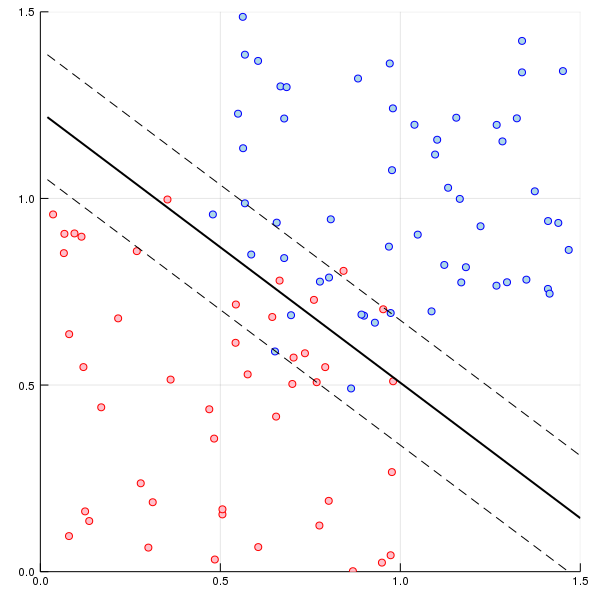
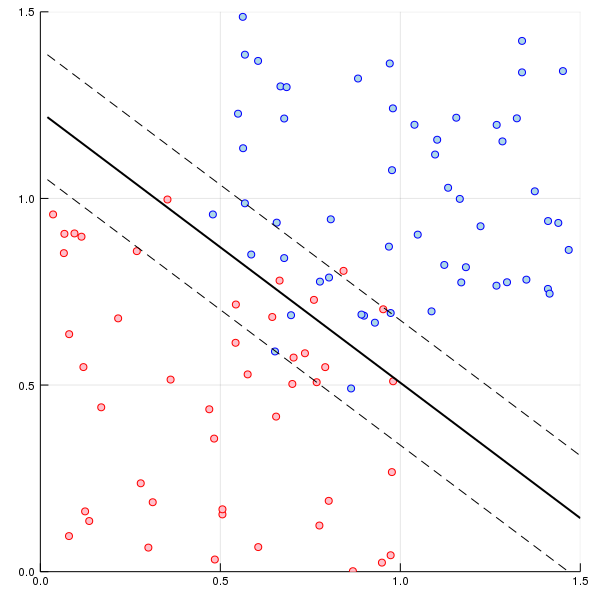

In [38]:
using JuMP, Ipopt

@manipulate for C = 10.0 .^ collect(-2:4)

    model = Model(solver = IpoptSolver(print_level = 0))
    @variable(model, w[1:2])
    @variable(model, b)
    @variable(model, ξ[1:m] ≥ 0)
    @objective(model, Min, 0.5 * dot(w, w) + C * sum(ξ[i] for i = 1:m))
    @constraint(model, [i = 1:m], y[i] * (dot(w, x[i,:]) + b) >= 1.0 - ξ[i])

    solve(model)
    w = getvalue(w)
    b = getvalue(b)
    ξ = getvalue(ξ)

    plot(leg = false)

    scatter!(x[P,1], x[P,2],  m=(stroke(1,:blue),:lightblue,4), leg=false)
    scatter!(x[N,1], x[N,2], m=(stroke(1,:red),:pink,4))

    plot!(x -> -(w[1] * x + b) / w[2], 0, 2, c=:black, lw=2)
    plot!(x -> -(1 + w[1] * x + b) / w[2], 0, 2, c=:black, l=:dash)
    plot!(x -> -(-1 + w[1] * x + b) / w[2], 0, 2, c=:black, l=:dash)

    xlims!(0, 1.5)
    ylims!(0, 1.5)
    
end

## Classificação Não Linear

Por último, temos dados que não são linearmente separáveis, mas podem ser separáveis numa dimensão maior.

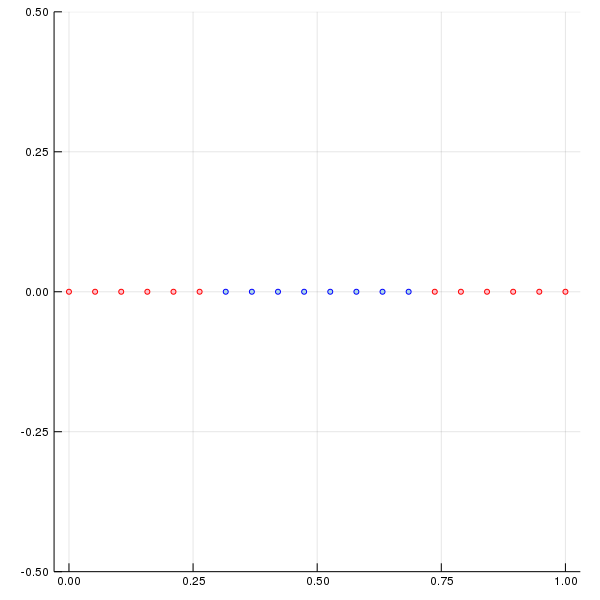

In [13]:
m = 20
x = linspace(0, 1, m)
y = [abs(x[i] - 0.5) < 0.2 ? 1 : -1 for i = 1:m]
P = find(y .== 1)
N = find(y .== -1)
scatter(x[P,1], zeros(length(P)), m=(stroke(1,:blue),:lightblue,3), leg=false)
scatter!(x[N,1], zeros(length(N)), m=(stroke(1,:red),:pink,3))
ylims!(-0.5, 0.5)

Vamos considerar a função $\phi(x) = [x; (x - 0.5)^2]$, e os dados $\tilde{x}^i = \phi(x^i)$.

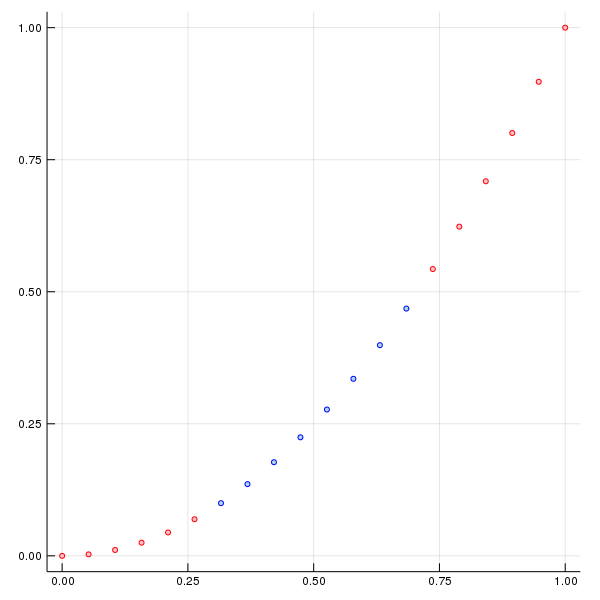

In [39]:
m = 20
x = linspace(0, 1, m)
y = [abs(x[i] - 0.5) < 0.2 ? 1 : -1 for i = 1:m]
P = find(y .== 1)
N = find(y .== -1)

xt = [x x.^2]

scatter(xt[P,1], xt[P,2], m=(stroke(1,:blue),:lightblue,3), leg=false)
scatter!(xt[N,1], xt[N,2], m=(stroke(1,:red),:pink,3))


Os dados $\tilde{x}^i$ estão em duas dimensões e são separáveis.

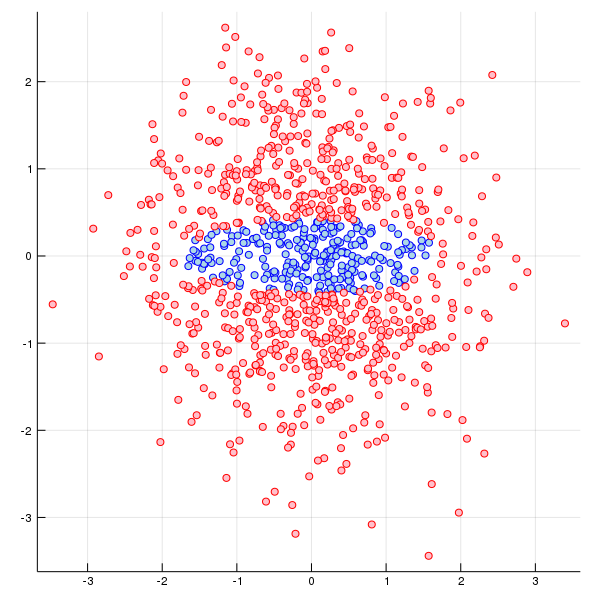

In [46]:
srand(0)
m = 1000
x = randn(m, 2)
y = [0.5 * x[i,1]^2 + 8 * x[i,2]^2 < 1.5 ? 1 : -1 for i = 1:m]
#y = [1.0 * x[i,1]^2 + 1.0 * x[i,2]^2 < 1.5 ? 1 : -1 for i = 1:m]
P = find(y .== 1)
N = find(y .== -1)
scatter(x[P,1], x[P,2],  m=(stroke(1,:blue),:lightblue,4), leg=false)
scatter!(x[N,1], x[N,2], m=(stroke(1,:red),:pink,4))

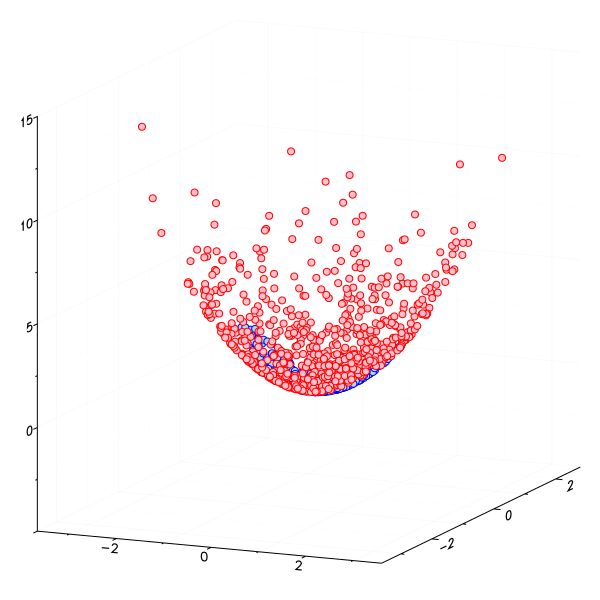

In [47]:
ϕx = [x[:,1] x[:,2] x[:,1].^2 + x[:,2].^2]

scatter(ϕx[P,1], ϕx[P,2], ϕx[P,3],  m=(stroke(1,:blue),:lightblue,4), leg=false)
scatter!(ϕx[N,1], ϕx[N,2], ϕx[N,3], m=(stroke(1,:red),:pink,4))

\begin{align}
\min & \quad \frac{1}{2}\Vert w\Vert^2 + C \sum_{i=1}^m \xi_i \\
    & \quad y^i(w^T \varphi(x^i) + b) \geq 1 - \xi_i, \qquad i = 1,\dots,m, \\
    & \quad \xi \geq 0.
\end{align}

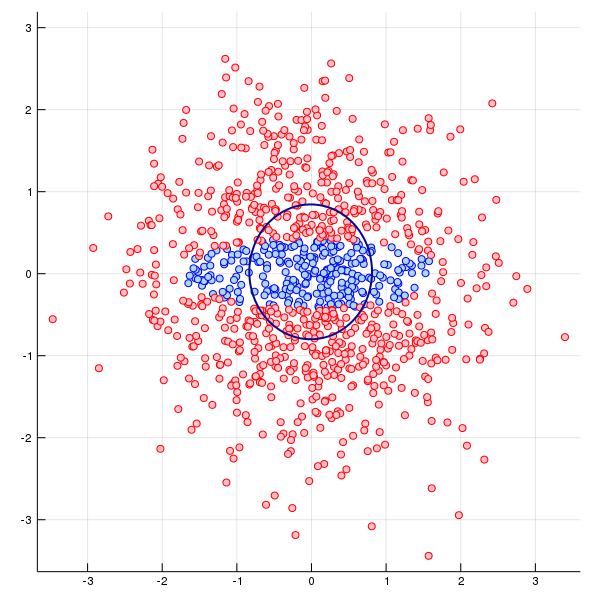

In [48]:
Φ = [x->x[1], x->x[2], x->x[1]^2 + x[2]^2]
n = length(Φ)

model = Model(solver = IpoptSolver(print_level = 0))
@variable(model, w[1:n])
@variable(model, b)
@variable(model, ξ[1:m] ≥ 0)
@objective(model, Min, 0.5 * dot(w, w) + 100.0 * sum(ξ[i] for i = 1:m))
@constraint(model, [i = 1:m], y[i] * (sum(w[j] * Φ[j](x[i,:]) for j = 1:n) + b) >= 1.0 - ξ[i])

solve(model)
w = getvalue(w)
b = getvalue(b)
ξ = getvalue(ξ)

plot(leg = false)

scatter!(x[P,1], x[P,2], m=(stroke(1,:blue),:lightblue,4), leg=false)
scatter!(x[N,1], x[N,2], m=(stroke(1,:red),:pink,4))

contour!(linspace(-3.0, 3.0, 100), linspace(-3.0, 3.0, 100),
        (x1, x2) -> sum(w[j] * Φ[j]([x1; x2]) for j = 1:n) + b,
        levels=[0.0], lw=2, c=:blues)

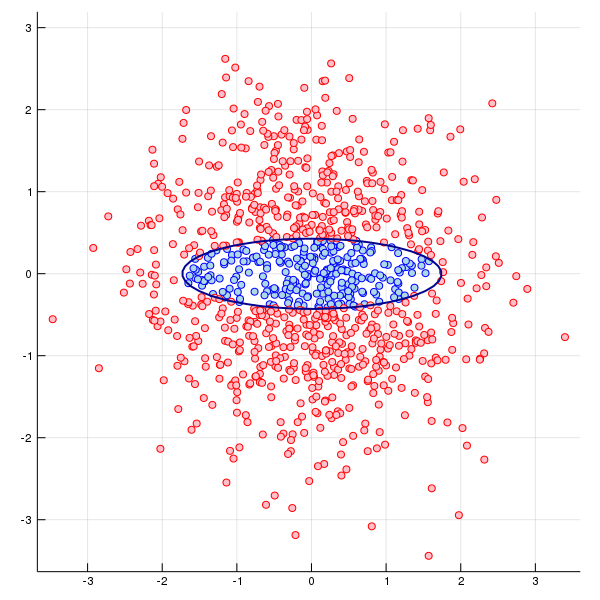

In [49]:
Φ = [x->x[1], x->x[2], x->x[1]^2, x->x[1]*x[2], x->x[2]^2]
n = length(Φ)

model = Model(solver = IpoptSolver(print_level = 0))
@variable(model, w[1:n])
@variable(model, b)
@variable(model, ξ[1:m] ≥ 0)
@objective(model, Min, 0.5 * dot(w, w) + 100.0 * sum(ξ[i] for i = 1:m))
@constraint(model, [i = 1:m], y[i] * (sum(w[j] * Φ[j](x[i,:]) for j = 1:n) + b) >= 1.0 - ξ[i])

solve(model)
w = getvalue(w)
b = getvalue(b)
ξ = getvalue(ξ)

plot(leg = false)

scatter!(x[P,1], x[P,2], m=(stroke(1,:blue),:lightblue,4), leg=false)
scatter!(x[N,1], x[N,2], m=(stroke(1,:red),:pink,4))

contour!(linspace(-3.0, 3.0, 100), linspace(-3.0, 3.0, 100),
        (x1, x2) -> sum(w[j] * Φ[j]([x1; x2]) for j = 1:n) + b,
        levels=[0.0], lw=2, c=:blues)

\begin{align}
\max \qquad & -\frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y^i y^j \varphi(x^i)^T \varphi(x^j) + 
\sum_{i = 1}^m \alpha_i \\
& \sum_{i = 1}^m y^i \alpha_i = 0, \\
& 0 \leq \alpha \leq C.
\end{align}

In [50]:
Φ = [x->x[1], x->x[2], x->x[1]^2, x->x[1]*x[2], x->x[2]^2]
n = length(Φ)

ϕ(x) = [Φ[j](x) for j = 1:n]

C = 100.0
model = Model(solver = IpoptSolver(print_level=0))
@variable(model, 0 ≤ α[1:m] ≤ C)
@objective(model, Max, -0.5 * sum(α[i] * α[j] * y[i] * y[j] * dot(ϕ(x[i,:]), ϕ(x[j,:])) for i = 1:m, j = 1:m)
    + sum(α[i] for i = 1:m))
@constraint(model, sum(y[i] * α[i] for i = 1:m) == 0)
solve(model)

α = getvalue(α)

1000-element Array{Float64,1}:
   0.0
   0.0
   0.0
   0.0
 100.0
   0.0
   0.0
   0.0
   0.0
 100.0
   0.0
   0.0
   0.0
   ⋮  
   0.0
   0.0
 100.0
   0.0
 100.0
   0.0
   0.0
   0.0
   0.0
   0.0
 100.0
   0.0

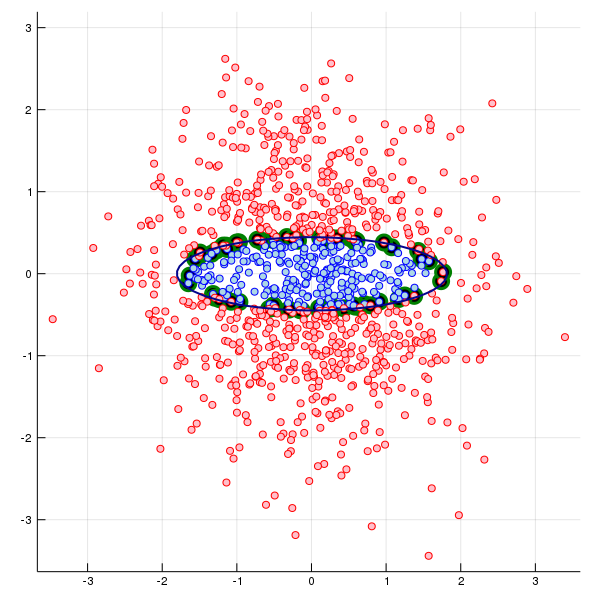

In [51]:
J = find(α .> 0)

plot(leg = false)

X = [Φ[j](x[i,:]) for i = J, j = 1:n]
w = X' * (α[J] .* y[J])
b = y[J[1]] - dot(w, ϕ(x[J[1],:]))

scatter!(x[J,1], x[J,2], m=(stroke(3,:green),:gray,7))

scatter!(x[P,1], x[P,2], m=(stroke(1,:blue),:lightblue,4), leg=false)
scatter!(x[N,1], x[N,2], m=(stroke(1,:red),:pink,4))

contour!(linspace(-3.0, 3.0, 100), linspace(-3.0, 3.0, 100),
        (x1, x2) -> sum(w[j] * Φ[j]([x1; x2]) for j = 1:n) + b,
        levels=[0.0], lw=2, c=:blues)

## Kernel

Quando trabalhamos com a transformação $\phi$, estamos aumentando o número de características, mas veja que no dual o $\phi$ só é usado no produto interno $$\phi(x^i)^T\phi(x^j).$$

Podemos definir uma função, $K(x,\tilde{x}) = \phi(x)^T\phi(\tilde{x})$, mas que não envolve o conhecimento de $\phi$.

Por exemplo,
\begin{align}
K(x,\tilde{x}) & = (x^T\tilde{x})^2 \\
& = (x_1\tilde{x}_1 + x_2\tilde{x}_2)^2 \\
& = x_1^2\tilde{x}_1^2 + 2x_1\tilde{x}_1x_2\tilde{x}_2 + x_2^2\tilde{x}_2^2 \\
& = (x_1, \sqrt{2} x_1x_2, x_2)^T (\tilde{x}_1, \sqrt{2} \tilde{x}_1 \tilde{x}_2, \tilde{x}_2),
\end{align}
equivale a usar $\phi(x) = (x_1, \sqrt{2}x_1x_2, x_2)$.

A vantagem é que $\phi$ não precisa ser conhecida e a complexidade diminui bastante. Por exemplo,
$K(x,\tilde{x}) = (x^T\tilde{x})^p$ pode ser usada para polinômios de grau até $p$, e não precisa de cálculo extras.

Dito isso, a maneira de se obter a curva separadora também muda.

Se $\alpha^*$ é a solução do problema dual, os valores de suporte são aqueles tais que $0 < \alpha_i^* < C$.
Chamaremos o conjunto dos $i$ tal que isso acontece de $J$.
No lugar de $w^Tx + b = 0$, usamos $F(x) + b = 0$, onde

$$ F(x) = \sum_{i \in J} \alpha_i^* y^i K(x,x^i), $$

e $b$ pode ser calculado por

$$ b = y^j - F(x^j), $$

para algum $j \in J$.

In [52]:
K(x1, x2) = dot(x1, x2)^2

C = 100.0
model = Model(solver = IpoptSolver(print_level=0))
@variable(model, 0 ≤ α[1:m] ≤ C)
@objective(model, Max, -0.5 * sum(α[i] * α[j] * y[i] * y[j] * K(x[i,:], x[j,:]) for i = 1:m, j = 1:m)
    + sum(α[i] for i = 1:m))
@constraint(model, sum(y[i] * α[i] for i = 1:m) == 0)
solve(model)

α = getvalue(α)

1000-element Array{Float64,1}:
   0.0
   0.0
   0.0
   0.0
 100.0
   0.0
   0.0
   0.0
   0.0
 100.0
   0.0
   0.0
   0.0
   ⋮  
   0.0
   0.0
 100.0
   0.0
 100.0
   0.0
   0.0
   0.0
   0.0
   0.0
 100.0
   0.0

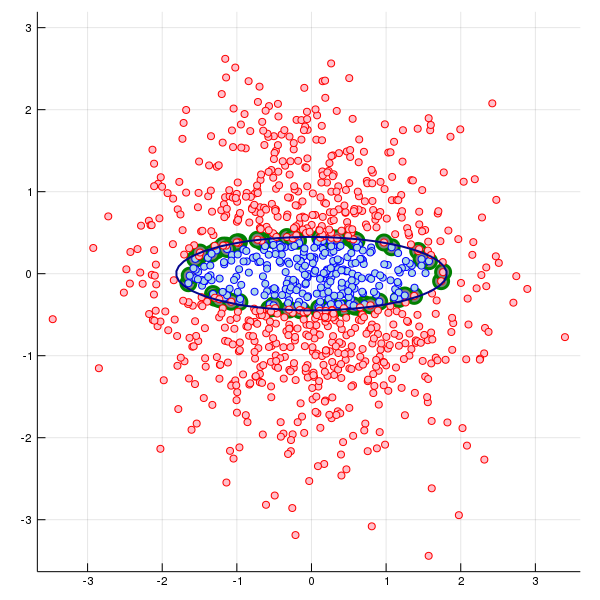

In [53]:
J = find(α .> 0)

plot(leg = false)

F(xx) = sum(α[i] * y[i] * K(xx, x[i,:]) for i = J)
b = y[J[1]] - F(x[J[1],:])

scatter!(x[J,1], x[J,2], m=(stroke(3,:green),:grey,7))

scatter!(x[P,1], x[P,2], m=(stroke(1,:blue),:lightblue,4), leg=false)
scatter!(x[N,1], x[N,2], m=(stroke(1,:red),:pink,4))

contour!(linspace(-3.0, 3.0, 100), linspace(-3.0, 3.0, 100),
        (x1, x2) -> F([x1; x2]) + b,
        levels=[0.0], lw=2, c=:blues)

Alguns possíveis Kernels:

| Nome | $K(x, \tilde{x})$ | 
| ---  | --- |
| Polinomial | $(x^T\tilde{x} + \theta)^p$ |
| Gaussiano (RBF) | $\text{exp}(-\gamma \Vert x - \tilde{x}\Vert^2)$ |
| Sigmoid | $\text{tanh}(\eta x^T\tilde{x} + \theta)$ |

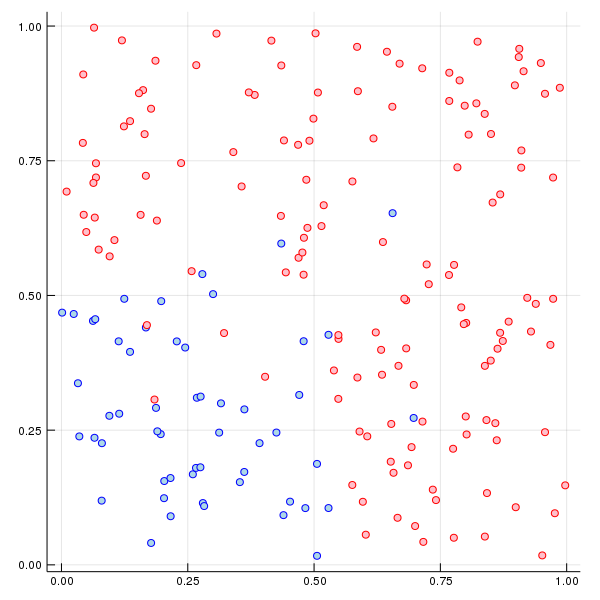

In [54]:
srand(0)
m = 200
x = rand(m, 2)
y = [max(x[i,1], x[i,2]) + randn() * 0.1 < 0.5 ? 1 : -1 for i = 1:m]
P = find(y .== 1)
N = find(y .== -1)
scatter(x[P,1], x[P,2],  m=(stroke(1,:blue),:lightblue,4), leg=false)
scatter!(x[N,1], x[N,2], m=(stroke(1,:red),:pink,4))

(div
  Widgets.Widget{:togglebuttons}(DataStructures.OrderedDict{Symbol,Any}(:options=>Observables.Observable{Array{Function,1}}("ob_95", Function[#402, #403, #404, #405, #406], Any[Observables.g, Observables.g]),:index=>Observables.Observable{Any}("ob_98", 3, Any[Widgets.#32, WebIO.SyncCallback(WebIO.Scope("knockout-component-4fcf2407-980e-4027-a5ce-53e88214c808", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["ker"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :button), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text : key"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"click: function () {\$root.index(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'button is-fullwidth' : true}"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, "data-bind"=>"foreach : options_js"),Pair{Symbol,Any}(:className, "field is-grouped has-addons is-oneline is-centered")), 2)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 3), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol,Any}(), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 9), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("options_js", (Observables.Observable{Any}("ob_99", DataStructures.OrderedDict[DataStructures.OrderedDict{String,Any}("key"=>"#402","val"=>1,"id"=>"idGsi40QCO"), DataStructures.OrderedDict{String,Any}("key"=>"#403","val"=>2,"id"=>"idWJGZuWGO"), DataStructures.OrderedDict{String,Any}("key"=>"#404","val"=>3,"id"=>"idT6WYVa3U"), DataStructures.OrderedDict{String,Any}("key"=>"#405","val"=>4,"id"=>"idNOLOgUCf"), DataStructures.OrderedDict{String,Any}("key"=>"#406","val"=>5,"id"=>"id4RqhPZ8M")], Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37))]), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("index", (Observables.Observable{Any}(#= circular reference @-7 =#), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/abel/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/abel/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/abel/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/abel/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/abel/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\",
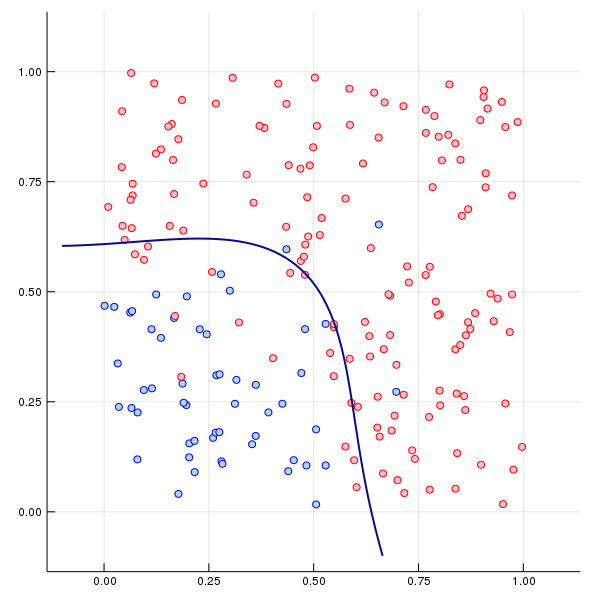
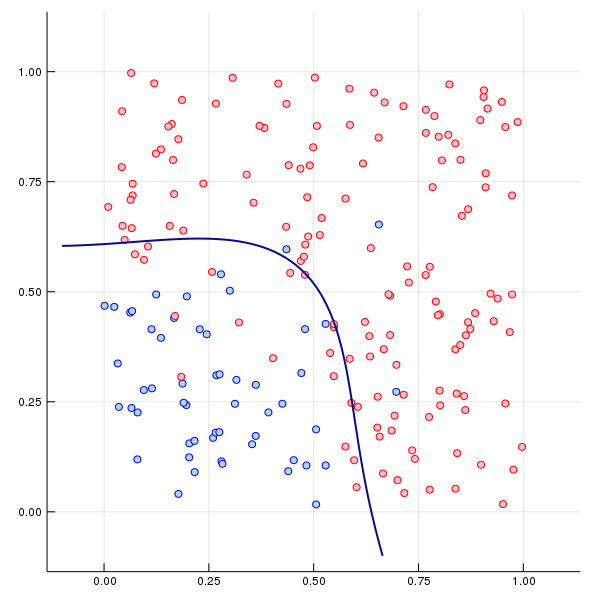

In [55]:
@manipulate for ker in [(x1, x2) -> dot(x1, x2)^2,
                        (x1, x2) -> dot(x1, x2)^3,
                        (x1, x2) -> dot(x1, x2)^4,
                        (x1, x2) -> exp(-2.0 * norm(x1 - x2)^2),
                        (x1, x2) -> tanh(1.0 * dot(x1, x2) - 1.0)]

    C = 100.0
    model = Model(solver = IpoptSolver(print_level=0))
    @variable(model, 0 ≤ α[1:m] ≤ C)
    @objective(model, Max, -0.5 * sum(α[i] * α[j] * y[i] * y[j] * ker(x[i,:], x[j,:]) for i = 1:m, j = 1:m)
        + sum(α[i] for i = 1:m))
    @constraint(model, sum(y[i] * α[i] for i = 1:m) == 0)
    solve(model)

    α = getvalue(α)
    J = find(α .> 0)
    F(xx) = sum(α[i] * y[i] * ker(xx, x[i,:]) for i = J)
    b = y[J[1]] - F(x[J[1],:])

    plot(leg = false)
    #scatter!(x[J,1], x[J,2], m=(stroke(3,:green),:grey,7))
    scatter!(x[P,1], x[P,2], m=(stroke(1,:blue),:lightblue,4), leg=false)
    scatter!(x[N,1], x[N,2], m=(stroke(1,:red),:pink,4))

    contour!(linspace(-0.1, 1.1, 100), linspace(-0.1, 1.1, 100),
            (x1, x2) -> F([x1; x2]) + b,
            levels=[0.0], lw=2, c=:blues)
end